In [1]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
#plt.rcParams['figure.dpi'] = 300
#plt.rcParams['savefig.dpi'] = 300
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [8]:
f = np.load("/afs/ihep.ac.cn/users/l/luoxj/sk_psd/predict_Combine.npz", allow_pickle=True)
dir_events = f["dir_events"].item()
print(dir_events.keys())

dict_keys(['fileid', 'evtID', 'eleID', 'Eqe', 'r3', 'r_xy', 'zz', 'r3_true', 'h_time_without_charge', 'h_time_with_charge', 'tag', 'PSD'])


Text(0.5, 1.0, 'PSD Input')

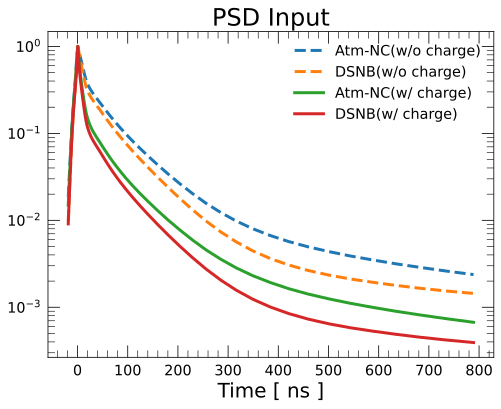

In [27]:
bins = np.array([-19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,
                 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46,
                 48, 50, 52, 54, 56, 58, 60, 62, 66, 72, 80, 90, 102, 116, 132, 150, 170, 192, 216, 242, 270, 300, 332, 366,
                 402, 440, 480, 522, 566, 612, 660, 710, 762, 816])
from HistTools import GetBinCenter
# print(dir_events["tag"])
dir_h_time_mean = {}
dir_h_time_mean["Atm-NC(w/o charge)"] = np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==0], axis=0)
dir_h_time_mean["DSNB(w/o charge)"] = np.mean(dir_events["h_time_without_charge"][dir_events["tag"]==1], axis=0)

dir_h_time_mean["Atm-NC(w/ charge)"] = np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==0], axis=0)
dir_h_time_mean["DSNB(w/ charge)"] = np.mean(dir_events["h_time_with_charge"][dir_events["tag"]==1], axis=0)
# print(h_time_atm)
for key, h_time in dir_h_time_mean.items():
    line_style = "--" if "w/o" in key else "-"
    plt.plot(GetBinCenter(bins), h_time/np.diff(bins)/np.max(h_time/np.diff(bins)),label=key,linestyle=line_style)
plt.semilogy()
plt.legend()
plt.xlabel("Time [ ns ]")
plt.title("PSD Input")

In [28]:
plt.hist(dir_events["PSD"])

[3.84866625e-05 1.97311759e-04 6.08831988e-05 ... 9.95242670e-01
 9.95873712e-01 9.81898392e-01]
